### Init stuff

In [1]:
from matplotlib.pyplot import *
import matplotlib
from numpy import *
import pandas as pd
import niddk_covid_sicr as ncs

### Define ROI

In [83]:
roi = 'us_ny'

### Define paths and other

In [110]:
linear_models = ['SICRLM','SICRLM2R','SICRLMQC','SICRLMQC2R']
nonlinear_models = ['SICRM','SICRM2R','SICRMQC','SICRMQC2R']
# models = linear_models #+ nonlinear_models
models = ['SICRMQC']
models = ['SICRdiscrete1']
# models = ['SICRLM2R']

models_path = '/Users/carsonc/github/covid-sicr/models/'
casepath = '/Users/carsonc/github/covid-sicr/data/covidtimeseries_'
fits_path = '/Users/carsonc/github/covid-sicr/fits/'

In [4]:
%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [15]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)



def plot_ts(ax,c,r,d,x):
    Clb = percentile(c,2.5,axis=0)
    Cm = percentile(c,50,axis=0)
    Cub = percentile(c,97.5,axis=0)

    Rlb = percentile(r,2.5,axis=0)
    Rm = percentile(r,50,axis=0)
    Rub = percentile(r,97.5,axis=0)

    Dlb = percentile(d,2.5,axis=0)
    Dm = percentile(d,50,axis=0)
    Dub = percentile(d,97.5,axis=0)

    mecolor = 'none'
    ax[0].plot(DF["new_cases"].values,'bo',ms=10, markeredgecolor=mecolor,label="cases data")
    ax[1].plot(DF["new_recover"].values,'gs',ms=10, markeredgecolor=mecolor,label="recovered data")
    ax[2].plot(DF["new_deaths"].values,'k^',ms=10, markeredgecolor=mecolor,label="deaths data")

    # print(c)
    ax[0].plot(x,Cm,color='b',lw=lw,label="case median fit")
    ax[0].fill_between(x,Clb,Cub,color='b',alpha=a)
    
    ax[1].plot(x,Rm,color='g',lw=lw,label="recovered median fit")
    ax[1].fill_between(x,Rlb,Rub,color='g',alpha=a)
    
    ax[2].plot(x,Dm,color='k',lw=lw,label="deaths median fit")
    ax[2].fill_between(x,Dlb,Dub,color='k',alpha=a)
    
    
    ax[0].plot(x,Clb,color='k')
    ax[0].plot(x,Cub,color='k')
    
    ax[1].plot(x,Rlb,color='k')
    ax[1].plot(x,Rub,color='k')
    
    ax[2].plot(x,Dlb,color='k')
    ax[2].plot(x,Dub,color='k')
    
    for i in range(3):
        ax[i].set_ylabel('counts-per-day')
        ax[i].set_xlabel('day from t0')
#         ax[i].set_xticks(xticks_)
#         ax[i].set_xticklabels(xdates_)
#         ax[i].axvline(tm,linestyle='dashed',color='k',label='mitigation')
#         ax[i].axvline(tfit,color='k')
        if i==0:
            ax[0].plot(0,0,linestyle='none',color='none', label='shaded: 95% C.I.')
        ax[i].legend(loc=2)
        simpleaxis(ax[i])
    
    
    ax[0].set_title('new cases per day')
    ax[1].set_title('new recovered per day')
    ax[2].set_title('new deaths per day')
    
    
    
    return

def plotXt(ax,Xt,x,c):
    Xtlb = percentile(Xt,2.5,axis=0)
    Xtm = percentile(Xt,50,axis=0)
    Xtub = percentile(Xt,97.5,axis=0)
    
    ax.plot(x,Xtm,color=c,lw=lw,label="median")
    ax.fill_between(x,Xtlb,Xtub,color=c,alpha=a)
    ax.plot(x,Xtlb,color='k')
    ax.plot(x,Xtub,color='k')
    simpleaxis(ax)
#     ax.set_ylabel('secondary infections per infected')
#     ax.set_xticks(xticks_)
#     ax.set_xticklabels(xdates_)
#     ax.set_ylim((0,32))
#     ax.set_yticks(y_)
#     ax.axvline(tm,linestyle='dashed',color='k',label='mitigation')
#     ax.axvline(tfit,color='k')
    return

### Load data 

In [6]:
#  if roi[:2]=='US':
#     DF = getDF_covidtrack(roi.split('US_')[1])
# else:
#     DF = getDF_JHU(roi)

In [84]:
csv = casepath + roi + ".csv"
DF = pd.read_csv(csv)

### Format data

In [85]:
# filter data frame by April 15th cutoff date

# ind = DF.index[DF.date=='04/15/20'].values[0]
# DF = DF[DF.index<=ind]


# get t0
t0 = DF.index[DF.new_cases>5].values[0]
DF = DF[DF.index>=t0]

### get samples

SICRdiscrete1
3000


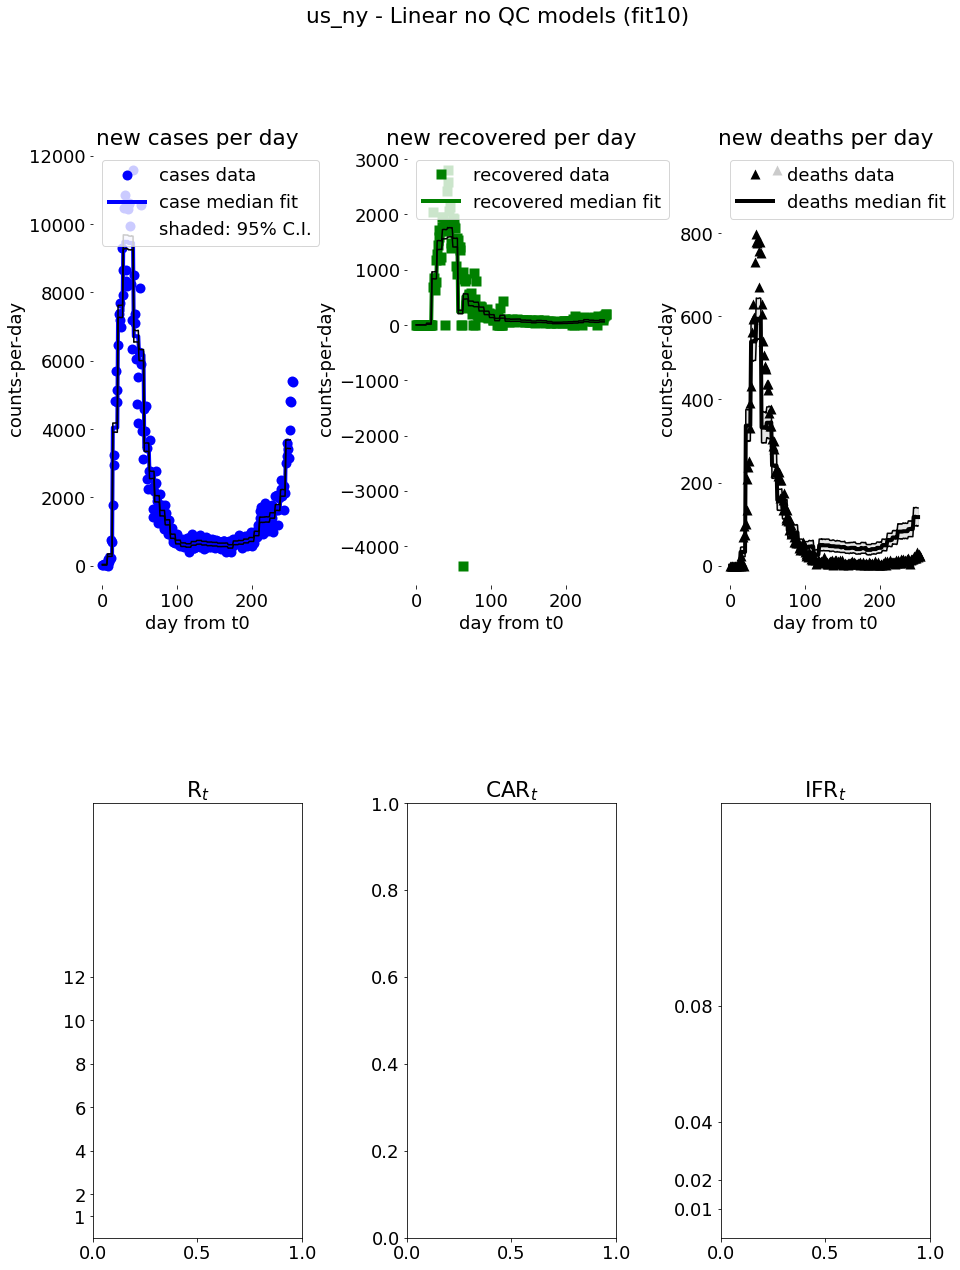

In [116]:
for model_name in models:
    print(model_name)
    samples = ncs.extract_samples(fits_path, models_path, model_name, roi, 1)
    nsamples = shape(samples['sigmau'])[0]
    print(nsamples)
    for i in np.arange(1000,1,-1).astype(str):
        try:
            a = samples['y_proj['+i+',1]']
            break
        except:
            pass
    nobs = int(i)
    c = zeros((nsamples,1))
    r = zeros((nsamples,1))
    d = zeros((nsamples,1))
    Rt = zeros((nsamples,1))
    CARt = zeros((nsamples,1))
    IFRt = zeros((nsamples,1))

    for i in range(1,nobs+1):
        c = np.hstack((c,samples['y_proj['+str(i)+',1]'][:,None]))
        r = np.hstack((r,samples['y_proj['+str(i)+',2]'][:,None]))
        d = np.hstack((d,samples['y_proj['+str(i)+',3]'][:,None]))
#         Rt = np.hstack((Rt,samples['Rt['+str(i)+']'][:,None]))
#         CARt = np.hstack((CARt,samples['car['+str(i)+']'][:,None]))
#         IFRt = np.hstack((IFRt,samples['ifr['+str(i)+']'][:,None]))

c = c[:,1:]
r = r[:,1:]
d = d[:,1:]
Rt = Rt[:,1:]
CARt = CARt[:,1:]
IFRt = IFRt[:,1:]
                       
                       
lw = 4
f,ax = subplots(2,3,figsize=(15,20))
ax = ax.flatten()
a = 0.1
x = arange(nobs)
plot_ts(ax[:3],c,r,d,x)

ax[3].set_title(r'R$_t$')
# plotXt(ax[3],Rt,x,'purple')
ax[3].set_ylim((0,20))
ax[3].set_yticks([1,2,4,6,8,10,12])

ax[4].set_title(r'CAR$_t$')
# plotXt(ax[4],CARt,x,'orange')

ax[5].set_title(r'IFR$_t$')
# plotXt(ax[5],IFRt,x,'red')
ax[5].set_ylim((0,0.15))
ax[5].set_yticks([0.01,0.02,0.04,0.08])

suptitle(roi + ' - Linear no QC models (fit10)')
subplots_adjust(wspace=0.5,hspace=0.5)



In [50]:
# def fix_date(x):
#     x = datetime.strftime(datetime.strptime(x, '%m/%d/%y'), '%m/%d/%y')
#     return x

# def fix_date_covidtrack(x):
#     x = datetime.strftime(datetime.strptime(str(x), '%Y%m%d'), '%m/%d/%y')
#     return x 

# def getDF_covidtrack(roi):
#     url = 'https://raw.githubusercontent.com/COVID19Tracking/covid-tracking-data/master/data/states_daily_4pm_et.csv'
#     df = pd.read_csv(url)
#     DF = pd.DataFrame(columns=['date', 
#                                'cum_cases','cum_recover','cum_deaths', 
#                                'new_cases', 'new_recover', 'new_deaths'])
#     df = df[df['state']==roi]
#     date = sort(df['date'].values)
#     for i in range(len(date)):
#         DF.loc[i] = pd.Series({
#                              'date':fix_date_covidtrack(date[i]),
#                              'cum_cases':df.loc[df['date']==date[i]]['positive'].values[0],
#                              'cum_recover':df.loc[df['date']==date[i]]['recovered'].values[0],
#                              'cum_deaths':df.loc[df['date']==date[i]]['death'].values[0],
#                             })
#     DF[['new_cases', 'new_recover', 'new_deaths']] = \
#     DF[['cum_cases',  'cum_recover', 'cum_deaths']].diff()
#     if isnan(DF.new_cases.values[0]):
#         DF = DF.iloc[1:]
#     return DF

# def getDF_JHU(roi):
#     url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
#     url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
#     url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

#     dfc = pd.read_csv(url_confirmed)
#     dfr = pd.read_csv(url_recovered)
#     dfd = pd.read_csv(url_deaths)


#     DF = pd.DataFrame(columns=['date', 
#                                'cum_cases','cum_recover','cum_deaths', 
#                                'new_cases', 'new_recover', 'new_deaths'])

#     date = dfc.columns[4:].values
#     try:
#         for i in range(len(date)):
#           DF.loc[i] = pd.Series({
#                                 'date':fix_date(date[i]),
#                                  'cum_cases':dfc.loc[(dfc['Country/Region']==roi)&(dfc['Province/State'].isnull())][date[i]].values[0],
#                                  'cum_recover':dfr.loc[(dfr['Country/Region']==roi)&(dfc['Province/State'].isnull())][date[i]].values[0],
#                                  'cum_deaths':dfd.loc[(dfd['Country/Region']==roi)&(dfc['Province/State'].isnull())][date[i]].values[0],
#                                 })
#     except:
#         for i in range(len(date)):
#           DF.loc[i] = pd.Series({
#                                 'date':fix_date(date[i]),
#                                  'cum_cases':sum(dfc.loc[(dfc['Country/Region']==roi)][date[i]].values),
#                                  'cum_recover':sum(dfr.loc[(dfr['Country/Region']==roi)][date[i]].values),
#                                  'cum_deaths':sum(dfd.loc[(dfd['Country/Region']==roi)][date[i]].values),
#                                 })

#     DF[['new_cases', 'new_recover', 'new_deaths']] = \
#     DF[['cum_cases',  'cum_recover', 'cum_deaths']].diff()

#     # print(DF)
#     if isnan(DF.new_cases.values[0]):
#         DF = DF.iloc[1:]
#     return DF
